# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

# Import librairies and data

In [234]:
import pandas as pd
import numpy as npµ
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('Speed Dating Data.csv', encoding= "ISO-8859-1")

In [236]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# Data Cleaning

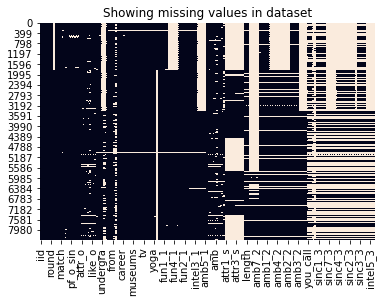

In [237]:
sns.heatmap(df.isna(), cbar=False)

plt.title('Showing missing values in dataset')
plt.show()

In [238]:
display(df.shape)

(8378, 195)

In [239]:
df['gender'].replace((0,1), ('Female','Male'), inplace = True)
df = df.rename(columns={'dec_o':'decision_partner'})


In [271]:
df['samerace'].replace((0,1), ('No','Yes'), inplace = True)

In [ ]:
df['decision_partner'].replace((0,1), ('No','Yes'), inplace = True)
df['dec'].replace((0,1), ('No','Yes'), inplace = True)

In [241]:
df['field_cd'] = df['field_cd'].apply(lambda x : 'Law' if x==1 
else 'Math' if x==2
else 'Social Science, Psychologist' if x==3
else 'Medical Science, Pharmaceuticals, Bio Tech' if x==4
else 'Engineering' if x==5
else 'English,Creative Writing, Journalism' if x==6
else 'History/Religion/Philosophy' if x==7
else 'Business/Econ/Finance' if x==8
else 'Education, Academia' if x==9
else 'Biological Sciences/Chemistry/Physics' if x==10
else 'Social Work' if x==11
else 'Undergrad/undecided ' if x==12
else 'Political Science/International Affairs' if x==13
else 'Film' if x==14
else 'Fine Arts/Arts Administration' if x==15
else 'Languages' if x==16
else 'Architecture' if x==17
else 'Other'
 )

In [130]:
df['date_3'].isna().sum()

4404

In [131]:
missing = df.isna().mean() * 100
mask = missing < 10
mask.value_counts()

False    108
True      87
dtype: int64

In [132]:
df_clean=df[df.columns[mask]]
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,Female,1,1,1,10,7,4,1,...,7.0,Yes,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,1,1.0,Female,1,1,1,10,7,3,2,...,7.0,Yes,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,1,1.0,Female,1,1,1,10,7,10,3,...,7.0,Yes,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,1,1.0,Female,1,1,1,10,7,5,4,...,7.0,Yes,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,1,1.0,Female,1,1,1,10,7,7,5,...,7.0,Yes,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


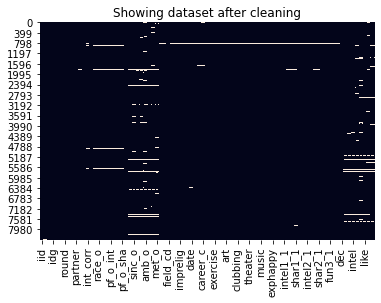

In [133]:
sns.heatmap(df_clean.isna(), cbar=False)
plt.title('Showing dataset after cleaning')
plt.show()

In [134]:
df_clean.shape

(8378, 87)

In [135]:
df3=df_clean.drop_duplicates(subset='iid')

In [136]:
df3

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,Female,1,1,1,10,7,4,1,...,7.0,Yes,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
10,2,2.0,Female,3,1,1,10,3,10,1,...,3.0,No,5.0,7.0,8.0,4.0,6.0,6.0,4.0,2.0
20,3,3.0,Female,5,1,1,10,9,6,1,...,8.0,No,7.0,9.0,10.0,7.0,8.0,8.0,7.0,1.0
30,4,4.0,Female,7,1,1,10,6,3,1,...,8.0,No,4.0,10.0,8.0,5.0,8.0,6.0,7.0,2.0
40,5,5.0,Female,9,1,1,10,4,1,1,...,8.0,No,5.0,8.0,8.0,2.0,2.0,7.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,18.0,Male,36,2,21,22,21,13,1,...,10.0,Yes,5.0,5.0,7.0,7.0,7.0,6.0,7.0,0.0
8290,549,19.0,Male,38,2,21,22,21,15,1,...,9.0,No,1.0,6.0,6.0,4.0,6.0,3.0,2.0,0.0
8312,550,20.0,Male,40,2,21,22,21,2,1,...,7.0,No,7.0,6.0,7.0,5.0,7.0,5.0,2.0,0.0
8334,551,21.0,Male,42,2,21,22,21,1,1,...,5.0,Yes,5.0,7.0,8.0,7.0,8.0,7.0,5.0,0.0


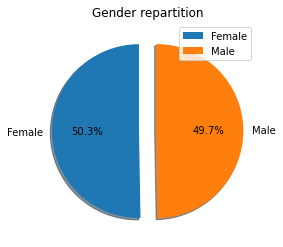

In [137]:
labels = df3['gender'].unique()
sizes = df3['gender'].value_counts()
explode=(0.1,0.1)
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)
plt.legend(df['gender'].unique())
plt.title('Gender repartition')
plt.show()

In [138]:
df['match'].mean()

0.16471711625686322

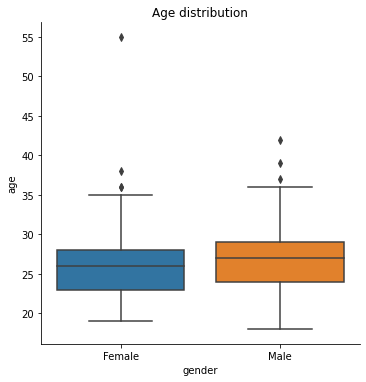

In [139]:
sns.catplot(x='gender', y='age', data=df3, kind='box')
plt.title('Age distribution')
plt.show()

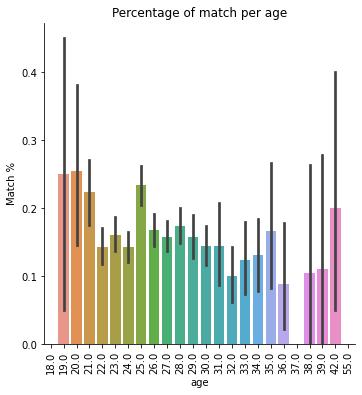

In [193]:
sns.catplot(x='age', y='match', data=df_clean, kind='bar')
plt.title('Percentage of match per age')
plt.xticks(rotation=90)
plt.ylabel('Match %')
plt.show()

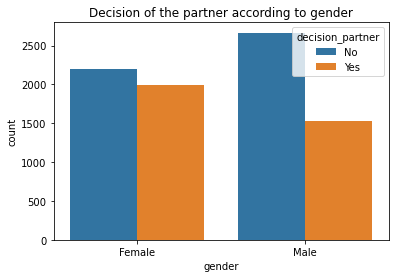

In [215]:
sns.countplot(hue='decision_partner', x='gender', data=df)
plt.title('Decision of the partner according to gender')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

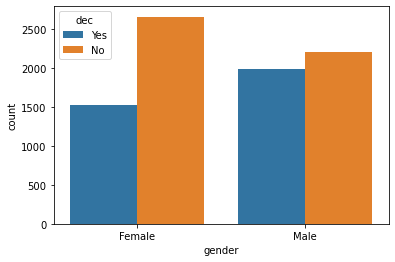

In [214]:
sns.countplot(hue='dec', x='gender', data=df)

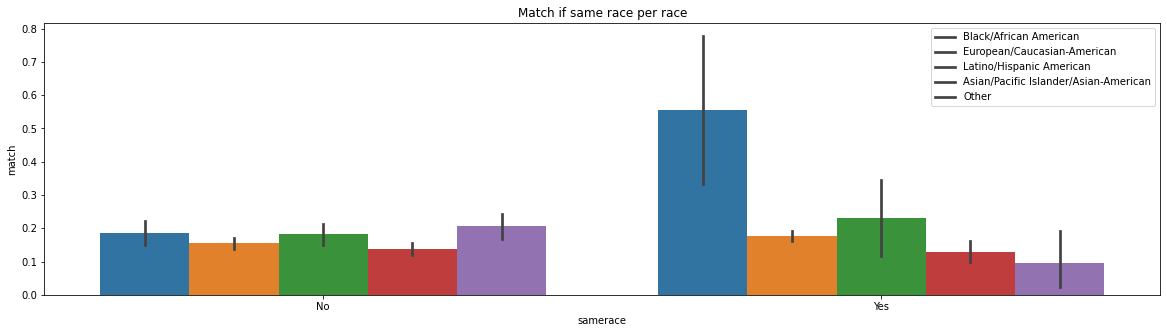

In [273]:
plt.figure(figsize=(20,5))
sns.barplot(y='match', x='samerace', hue='race', data=df)
plt.title('Match if same race per race')
plt.legend(['Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian/Pacific Islander/Asian-American', 'Other'])
plt.show()

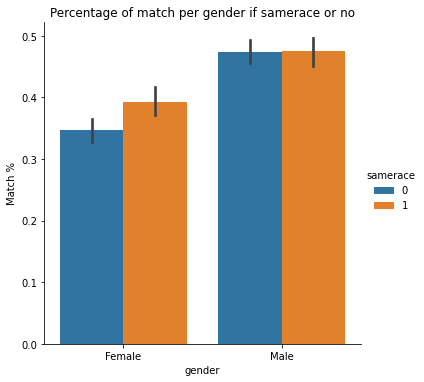

In [232]:
sns.catplot(y='dec', hue='samerace', x='gender', data=df, kind='bar')
plt.title('Percentage of match per gender if samerace or no')
plt.ylabel('Match %')
plt.show()

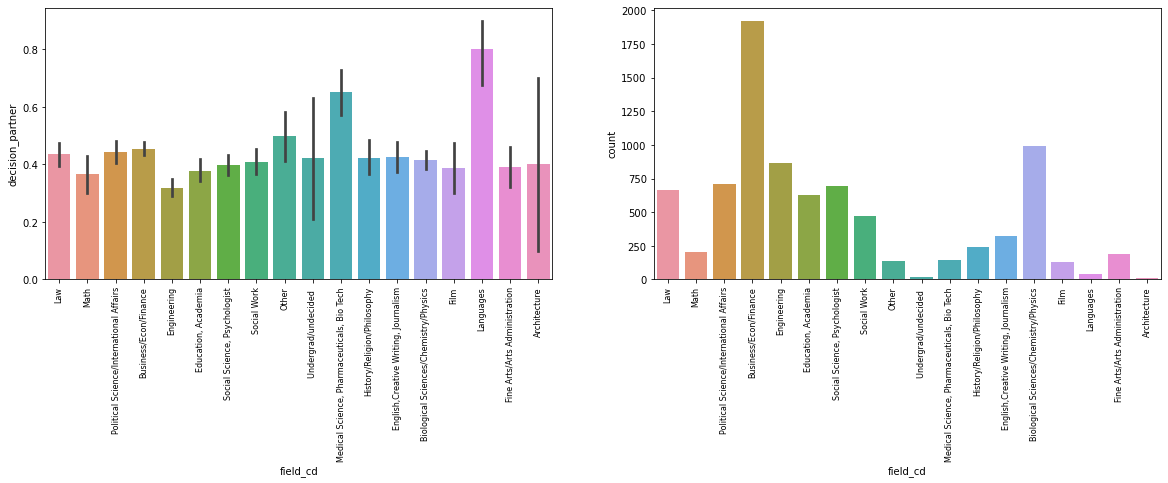

In [265]:
plt.figure(figsize=(20,5))

# First chart
plt.subplot(121)
sns.barplot(y='decision_partner', x='field_cd', data=df)
plt.xticks(size=8,rotation=90)

# Second chart
plt.subplot(122)
sns.countplot(x='field_cd', data=df)
plt.xticks(size=8,rotation=90)

plt.show();

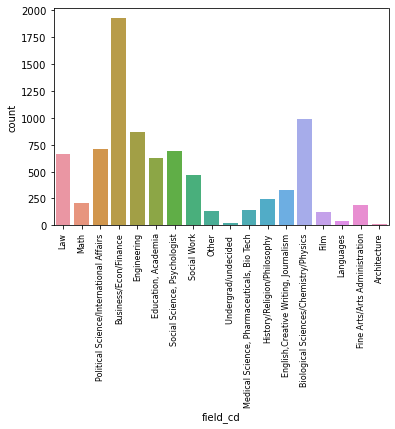

In [262]:
sns.countplot(x='field_cd', data=df)
plt.xticks(size=8,rotation=90)
plt.show()

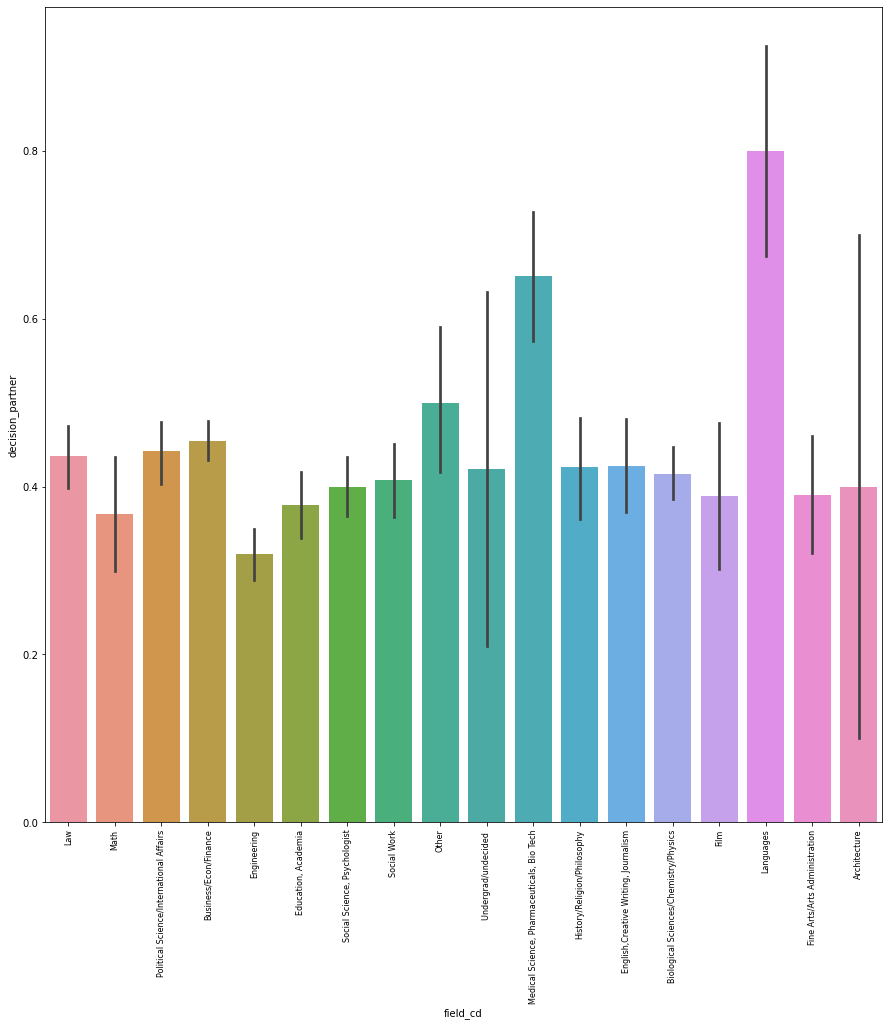

In [263]:
plt.figure(figsize=(15,15))
sns.barplot(y='decision_partner', x='field_cd', data=df)
plt.xticks(size=8,rotation=90)
plt.show()

In [22]:
corr = df_clean.corr()

In [23]:
corr['match'].sort_values(ascending=False).head(20)

match       1.000000
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
amb         0.140042
amb_o       0.139927
clubbing    0.055435
fun3_1      0.051066
fun1_1      0.041652
pf_o_fun    0.041483
yoga        0.036601
Name: match, dtype: float64

In [143]:
a = df3.groupby(by=['iid']).mean()

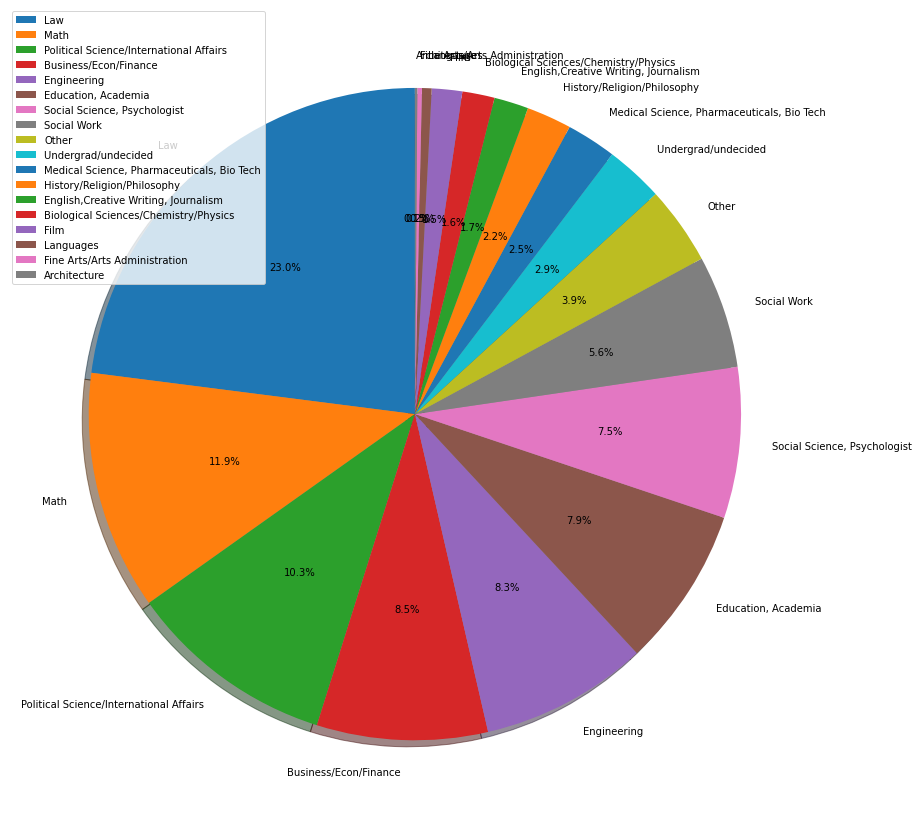

In [26]:
labels = df['field_cd'].unique()
sizes = df['field_cd'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.xticks(size=8,rotation=45)
plt.legend(labels)
plt.show()

In [164]:
df['decision_partner']

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
8373    Yes
8374     No
8375     No
8376    Yes
8377    Yes
Name: decision_partner, Length: 8378, dtype: object

In [188]:
df.groupby(by="field_cd").mean()['dec']

field_cd
Architecture                                  0.200000
Biological Sciences/Chemistry/Physics         0.435045
Business/Econ/Finance                         0.412468
Education, Academia                           0.453674
Engineering                                   0.472222
English,Creative Writing, Journalism          0.350769
Film                                          0.539683
Fine Arts/Arts Administration                 0.315508
History/Religion/Philosophy                   0.385892
Languages                                     0.400000
Law                                           0.463158
Math                                          0.352657
Medical Science, Pharmaceuticals, Bio Tech    0.468531
Other                                         0.313433
Political Science/International Affairs       0.406206
Social Science, Psychologist                  0.448276
Social Work                                   0.326923
Undergrad/undecided                           0.263158
N

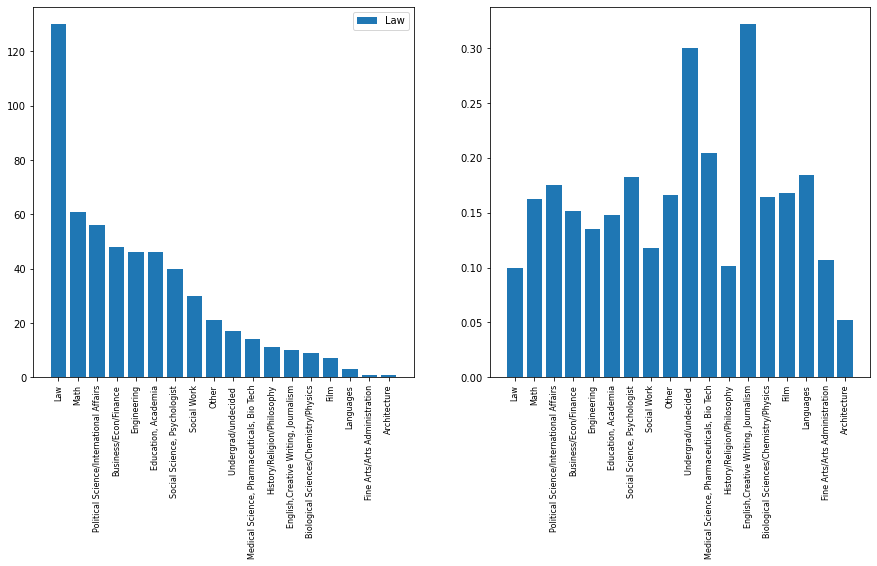

In [191]:
labels = df['field_cd'].unique()
sizes = df.groupby(by="field_cd").mean()['match']
plt.figure(figsize=(15,15))
plt.subplot(222)
plt.bar(labels, sizes)
plt.xticks(size=8,rotation=90)
plt.subplot(221)
plt.bar(labels, df3['field_cd'].value_counts())
plt.xticks(size=8,rotation=90)
plt.legend(labels)
plt.show()

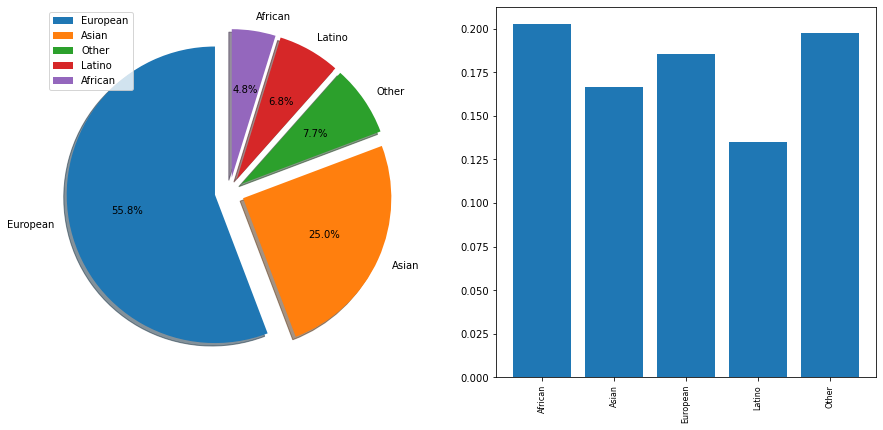

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(222)
labels = 'African', 'Asian', 'European', 'Latino', 'Other' 
sizes = df.groupby(by="race").mean()['match']
plt.bar(labels, sizes)
plt.xticks(size=8,rotation=90)
plt.subplot(221)
labels = 'European', 'Asian', 'Other', 'Latino', 'African'
sizes = df3['race'].value_counts()
explode=(0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.xticks(size=8,rotation=45)
plt.legend(labels)
plt.show()

In [152]:
hommes=df3[df3['gender']=='Male']
femmes=df3[df3['gender']=='Female']

In [65]:
b = ['attr1_1','sinc1_1','intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

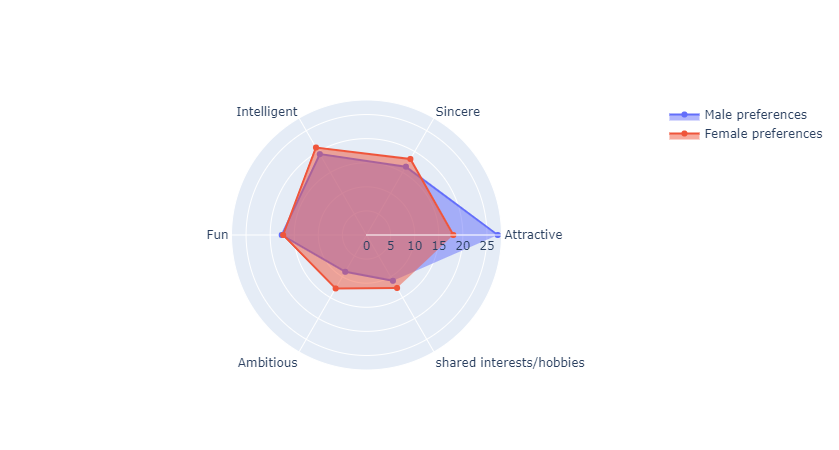

In [202]:
import plotly.graph_objects as go

b = ['attr1_1','sinc1_1','intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
theta=['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious', 'shared interests/hobbies']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[b].mean(),
    theta=theta,
    fill='toself',
    name='Male preferences'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[b].mean(),
    theta=theta,
    fill='toself',
    name='Female preferences'
))

fig.show()

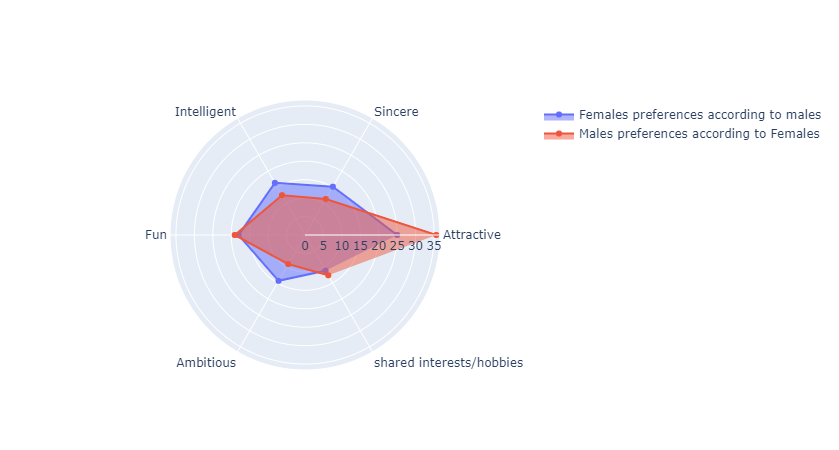

In [74]:
c = ['attr2_1','sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1' ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[c].mean(),
    theta=theta,
    fill='toself',
    name='Females preferences according to males'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[c].mean(),
    theta=theta,
    fill='toself',
    name='Males preferences according to Females'
))

fig.show()

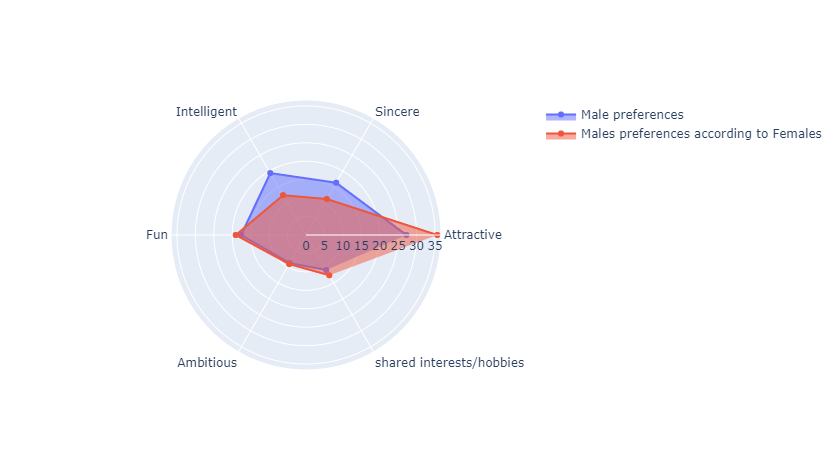

In [207]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[b].mean(),
    theta=theta,
    fill='toself',
    name='Male preferences'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[c].mean(),
    theta=theta,
    fill='toself',
    name='Males preferences according to Females'
))

fig.show()

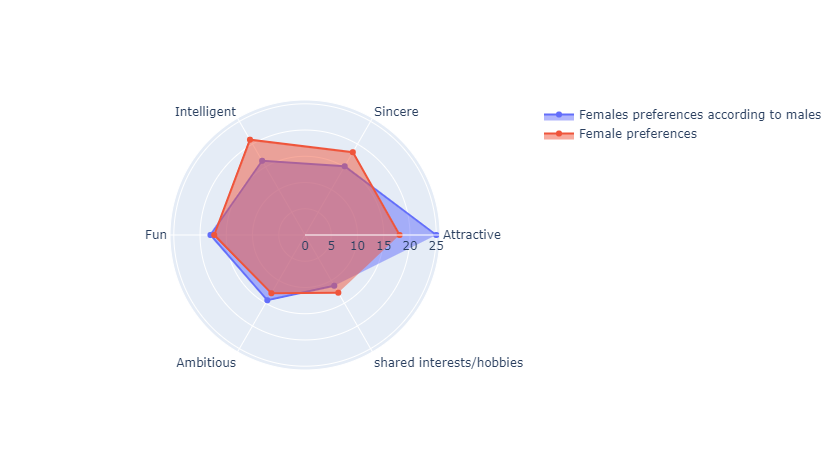

In [208]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[c].mean(),
    theta=theta,
    fill='toself',
    name='Females preferences according to males'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[b].mean(),
    theta=theta,
    fill='toself',
    name='Female preferences'
))

fig.show()